# Decreases in Fine Particle Air Pollution Between 1999 and 2012

## Synopsis

In this report we aim to describe the changes in fine particle (PM<sub>2.5</sub>) outdoor air pollution in the United States between the years 1999 and 2012. Our overall hypothesis is that out door PM<sub>2.5</sub> has decreased on average across the U.S. due to nationwide regulatory requirements arising from the Clean Air Act. To investigate this hypothesis, we obtained PM<sub>2.5</sub> data from the U.S. Environmental Protection Agency which is collected from monitors sited across the U.S. We specifically obtained data for the years 1999 and 2012 (the most recent complete year available). From these data, we found that, on average across the U.S., levels of PM<sub>2.5</sub> have decreased between 1999 and 2012. At one individual monitor, we found that levels have decreased and that the variability of PM<sub>2.5</sub> has decreased. Most individual states also experienced decreases in PM<sub>2.5</sub>, although some states saw increases.


## Loading and Processing the Raw Data

From the [EPA Air Quality System](http://www.epa.gov/ttn/airs/airsaqs/detaildata/downloadaqsdata.htm) we obtained data on fine particulate matter air pollution (PM<sub>2.5</sub>) that is monitored across the U.S. as part of the nationwide PM monitoring network. We obtained the files for the years [1999](http://www.epa.gov/ttn/airs/airsaqs/detaildata/501files/Rd_501_88101_1999.Zip) and [2012](http://www.epa.gov/ttn/airs/airsaqs/detaildata/501files/RD_501_88101_2012[1].zip).


### Reading in the 1999 data

We first read in the 1999 data from the raw text file included in the zip archive. The data is a delimited file were fields are delimited with the `|` character adn missing values are coded as blank fields. We skip some commented lines in the beginning of the file and initially we do not read the header data.

In [133]:
pm0 <- read.table("../Data/RD_501_88101_1999-0.txt", comment.char = "#", header = FALSE, sep = "|", na.strings = "")

In [1]:
#Construct path in a platform independent way
#file.path("file path","file name",fsep = .Platform$file.sep)

After reading in the 1999 we check the first few rows in this dataset. 

In [134]:
dim(pm0)
head(pm0[, 1:13])

[1] 117421     28

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
RD,I,1,27,1,88101,1,7,105,120,19990103,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990106,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990109,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990112,00:00,8.841
RD,I,1,27,1,88101,1,7,105,120,19990115,00:00,14.920
RD,I,1,27,1,88101,1,7,105,120,19990118,00:00,3.878


We then attach the column headers to the dataset and make sure that they are properly formated for R data frames.

In [135]:
cnames <- readLines("../Data/RD_501_88101_1999-0.txt", 1)
cnames <- strsplit(cnames, "|", fixed = TRUE)
names(pm0) <- make.names(cnames[[1]])  ## Ensure names are properly formatted
head(pm0[, 1:13])

X..RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,Date,Start.Time,Sample.Value
RD,I,1,27,1,88101,1,7,105,120,19990103,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990106,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990109,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990112,00:00,8.841
RD,I,1,27,1,88101,1,7,105,120,19990115,00:00,14.920
RD,I,1,27,1,88101,1,7,105,120,19990118,00:00,3.878


The column we are interested in is the Sample column which contains the PM<sub>2.5</sub> measurements. Here we extract that column and print a brief summary.

In [136]:
x0 <- pm0$Sample.Value
summary(x0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

Missing values are a common problem with environmental data and so we check to se what proportion of the observations are missing (i.e. coded as 'NA'). 

## Are missing values important here?

In [137]:
mean(is.na(x0))

[1] 0.1125608

Because the proportion of missing values is relatively low, we choose to ignore missing values for now.

### Reading in the 2012 data

We then read in the 2012 data in the same manner in which we read the 1999 data (the data files are in the same format). 

In [138]:
pm1 <- read.table("../Data/RD_501_88101_2012-0.txt", comment.char = "#", header = FALSE, sep = "|", na.strings = "", nrow = 1304290)

We also set the column names (they are the same ast the 1999 dataset) and extract the `Sample.Value` column from this dataset.

In [139]:
names(pm1) <- make.names(cnames[[1]])
x1 <- pm1$Sample.Value

## Results

### Entire U.S. analysis

In order to show aggregate changes in PM across the entire monitoring network, we can make boxplots of all monitor values in 1999 and 2012. Here, we take the log of the PM values to adjust for the skew in the data.

Warning message in boxplot.default(log2(x0), log2(x1)):
"NaNs produced"Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 2 is not drawn"

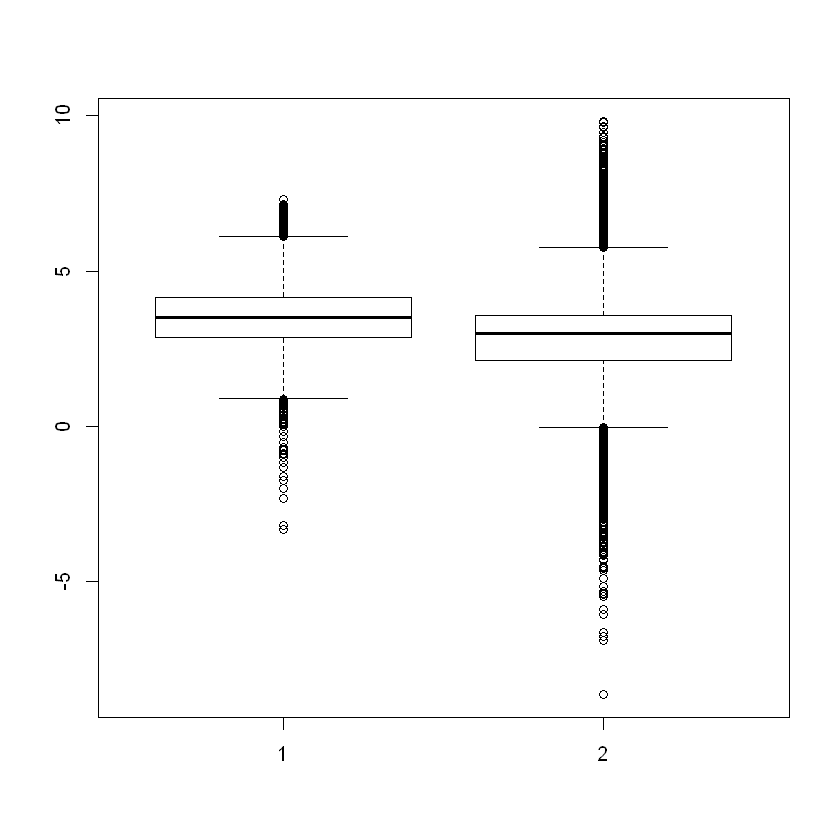

In [140]:
boxplot(log2(x0), log2(x1))

In [141]:
summary(x0)
summary(x1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -10.00    4.00    7.63    9.14   12.00  908.97   73133 

Interestingly, from the summary of `x1` it appears there are some negative values of PM, which in general should not occur. We can investigate that somewhat to see if there is anything we should worry about.

In [142]:
negative <- x1 < 0
mean(negative, na.rm = T)

[1] 0.0215034

There is a relatively small proportion of values that are negative, which is perhaps reassuring. In order to investigate this a step further we can extract the date of each measurement from the original data frame. The idea here is that perhaps negative values occur more often in some parts of the year than other parts. However, the original data are formatted as character strings so we convert them to R's `Date` format for easier manipulation.

In [143]:
dates <- pm1$Date
dates <- as.Date(as.character(dates), "%Y%m%d")

We can then extract the month from each of the dates with negative values and attempt to identify when negative values occur most often.

In [144]:
missing.months <- month.name[as.POSIXlt(dates)$mon + 1]
tab <- table(factor(missing.months, levels = month.name))
round(100 * tab / sum(tab))


  January  February     March     April       May      June      July    August 
       15        13        15        13        14        13         8         6 
September   October  November  December 
        3         0         0         0 

From the table above it appears that bulk of the negative values occur in the first six months of the year (January--June). However, beyond that simple observation, it is not clear why the negative values occur. That said, given the relatively low proportion of negative values, we will ignore them for now.

### Changes in PM levels at an individual monitor

So far we have examined the change in PM levels on average across the country. One issue with the previous analysis is that the monitoring network could have changed in the time period between 1999 and 2012. So if for some reason in 2012 there are more monitors concentrated in cleaner parts of the country than there were in 1999, it might appear the PM levels decreased when in fact they didn't. In this section we will focus on a single monitor in New York State to see if PM levels *at that monitor* decreased from 1999 to 2012. 

Our first task is to identify a monitor in New York State that has data in 1999 and 2012 (not all monitors operated during both time periods). First we subset the data frames to only include data from New York (`State.Code == 36`) and only include the `County.Code` and the `Site.ID` (i.e. monitor number) variables.

In [145]:
site0 <- unique(subset(pm0, State.Code == 36, c(County.Code, Site.ID)))
site1 <- unique(subset(pm1, State.Code == 36, c(County.Code, Site.ID)))

Then we create a new variable that combines the county code and the site ID into a single string.

Finaly, we want the intersection between the sites present in 1999 and 2012 so that we might choose a monitor that has data in both periods.


In [146]:
both <- intersect(site0, site1)
print(both)

   County.Code Site.ID
1            1       5
2            1      12
3            5      80
4           13      11
5           29       5
6           31       3
7           63    2008
8           67    1015
9           85      55
10         101       3


Here (above) we can see that there are `r length(both)` monitors that were operating in both time periods. However, rather than choose one at random, it might best to choose one that had a reasonable amount of data in each year.

In [147]:
pm0$county.site <- with(pm0, paste(County.Code, Site.ID, sep = "."))
pm1$county.site <- with(pm1, paste(County.Code, Site.ID, sep = "."))
cnt0 <- subset(pm0, State.Code == 36 & county.site %in% both)
cnt1 <- subset(pm1, State.Code == 36 & county.site %in% both)

Now that we have subsetted the original data frames to only include the data from the monitors that overlap between 1999 and 2012, we can split the data frames and count the number of observations at each monitor to see which ones have the most observations.

In [148]:
sapply(split(cnt0, cnt0$county.site), nrow)  ## 1999
sapply(split(cnt1, cnt1$county.site), nrow)  ## 2012

named list()

named list()

A number of monitors seem suitable from the output, but we will focus here on County 63 and site ID 2008.

In [149]:
both.county <- 63
both.id <- 2008

## Choose county 63 and side ID 2008
pm1sub <- subset(pm1, State.Code == 36 & County.Code == both.county & Site.ID == both.id)
pm0sub <- subset(pm0, State.Code == 36 & County.Code == both.county & Site.ID == both.id)

Now we plot the time series data of PM for the monitor in both years.

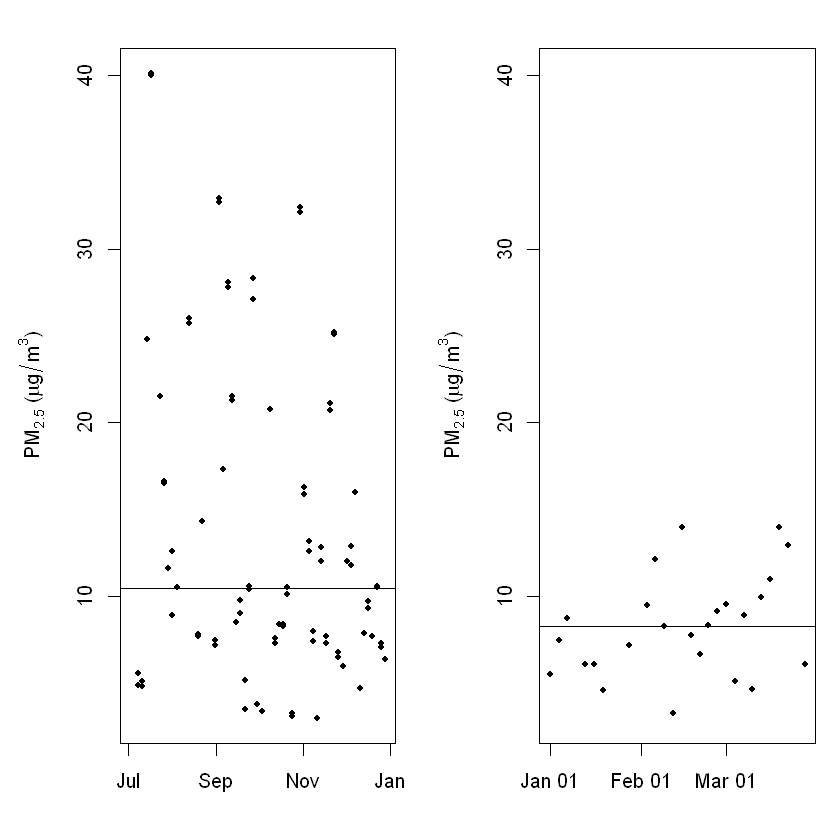

In [150]:
dates1 <- as.Date(as.character(pm1sub$Date), "%Y%m%d")
x1sub <- pm1sub$Sample.Value
dates0 <- as.Date(as.character(pm0sub$Date), "%Y%m%d")
x0sub <- pm0sub$Sample.Value

## Find global range
rng <- range(x0sub, x1sub, na.rm = T)
par(mfrow = c(1, 2), mar = c(4, 5, 2, 1))
plot(dates0, x0sub, pch = 20, ylim = rng, xlab = "", ylab = expression(PM[2.5] * " (" * mu * g/m^3 * ")"))
abline(h = median(x0sub, na.rm = T))
plot(dates1, x1sub, pch = 20, ylim = rng, xlab = "", ylab = expression(PM[2.5] * " (" * mu * g/m^3 * ")"))
abline(h = median(x1sub, na.rm = T))

From the plot above, we can that median levels of PM (horizontal solid line) have decreased a little from `r median(x0sub,na.rm=TRUE)` in 1999 to `r median(x1sub,na.rm=TRUE)` in 2012. However, perhaps more interesting is that the variation (spread) in the PM values in 2012 is much smaller than it was in 1999. This suggest that not only are median levels of PM lower in 2012, but that there are fewer large spikes from day to day. One issue with the data here is that the 1999 data are from July through December while the 2012 data are recorded in January through April. It would have been better if we'd had full-year data for both years as there could be some seasonal confounding going on.

### Changes in state-wide PM levels

Although ambient air quality standards are set at the federal level in the U.S. and hence affect the entire country, the actual reduction and management of PM is left to the individual states. States that are not "in attainment" have to develop a plan to reduce PM so that that the are in attainment (eventually). Therefore, it might be useful to examine changes in PM at the state level. This analysis falls somewhere in between looking at the entire country all at once and looking at an individual monitor.

What we do here is calculate the mean of PM for each state in 1999 and 2012.

In [151]:
mn0 <- with(pm0, tapply(Sample.Value, State.Code, mean, na.rm = TRUE))  ## 1999
mn1 <- with(pm1, tapply(Sample.Value, State.Code, mean, na.rm = TRUE))  ## 2012
## Make separate data frames for states / years
d0 <- data.frame(state = names(mn0), mean = mn0)
d1 <- data.frame(state = names(mn1), mean = mn1)
mrg <- merge(d0, d1, by = "state")
head(mrg)

state,mean.x,mean.y
1,19.956391,10.126190
10,14.492895,11.236059
11,15.786507,11.991697
12,11.137139,8.239690
13,19.943240,11.321364
15,4.861821,8.749336


Now make a plot that shows the 1999 state-wide means in one "column" and the 2012 state-wide means in another columns. We then draw a line connecting the means for each year in the same state to highlight the trend.

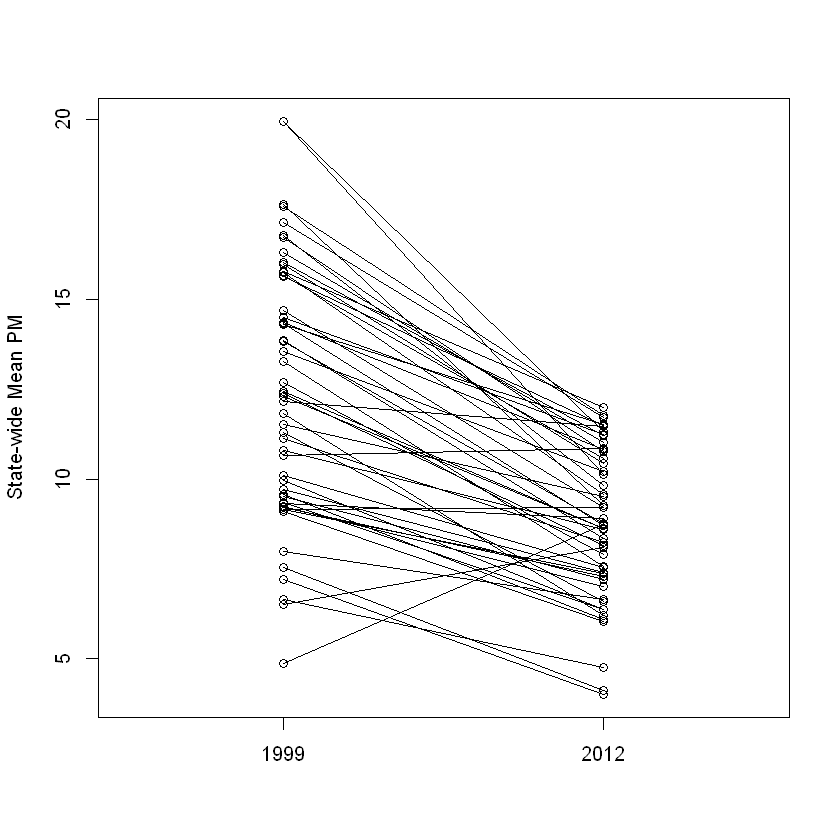

In [152]:
par(mfrow = c(1, 1))
rng <- range(mrg[,2], mrg[,3])
with(mrg, plot(rep(1, 52), mrg[, 2], xlim = c(.5, 2.5), ylim = rng, xaxt = "n", xlab = "", ylab = "State-wide Mean PM"))
with(mrg, points(rep(2, 52), mrg[, 3]))
segments(rep(1, 52), mrg[, 2], rep(2, 52), mrg[, 3])
axis(1, c(1, 2), c("1999", "2012"))

From the plot above we can see that many states have decreased the average PM levels from 1999 to 2012 (although a few states actually increased their levels).

In [1]:
#Environment Information
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.1      R6_2.2.2            magrittr_1.5       
 [4] IRdisplay_0.4.4     pbdZMQ_0.2-6        tools_3.4.1        
 [7] crayon_1.3.2        uuid_0.1-2          stringi_1.1.5      
[10] IRkernel_0.8.7.9000 jsonlite_1.5        stringr_1.2.0      
[13] digest_0.6.12       repr_0.12.0         evaluate_0.10.1    